1) The following data represent the lifetimes (in years) of a sample of 30 transformers manufactured by a company. Determine the sample mean, median, and mode. How close  is this dataset to a normal distribution? Use as many metrics as you can to verify your answer. 

34, 54, 46, 21, 56, 43, 39, 43, 29, 56, 38, 41, 45, 47, 37, 52, 51, 49, 32, 36, 27, 43, 29, 56, 37, 38, 32, 49, 45, 38 


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy as sp
import numpy as np

data_list = [
    34, 54, 46, 21, 56, 43, 39, 43, 29, 56, 38, 41, 45, 47, 37, 52, 51, 49, 32, 36, 27, 43, 29, 56, 37, 38, 32, 49, 45, 38 
]
data = pd.Series(data_list)

print(f"Mean: {data.mean()}")
print(f"Median: {data.median()}")
print(f"Mode: {data.mode().values}")

Mean: 41.43333333333333
Median: 42.0
Mode: [38 43 56]


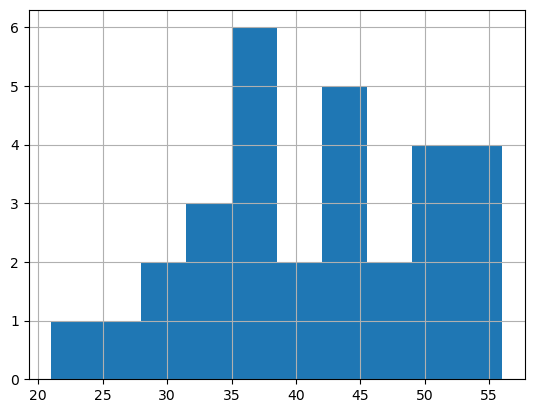

In [3]:
data.hist()
plt.show()

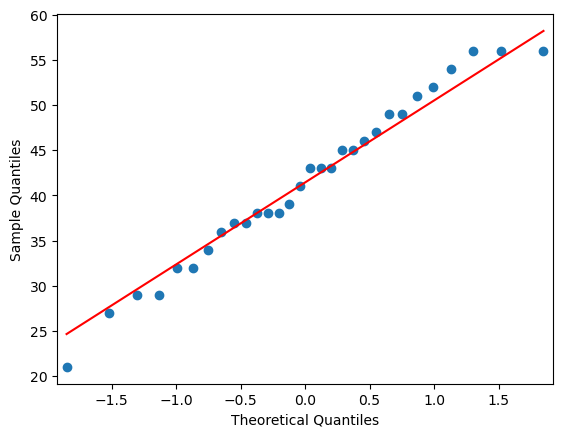

In [4]:
sm.qqplot(data, dist=sp.stats.distributions.norm, line='s')
plt.show()

In [16]:
ks_statistic, p_value = sp.stats.kstest(data, 'norm') 

print(f"KS statistic: {ks_statistic}")
print(f"p-value: {p_value}")

dummy_ks_statistic, dummy_p_value = sp.stats.kstest(pd.Series([1, 2, 2, 3, 2, 2, 1]), 'norm') 
print(f"\nDummy KS statistic: {ks_statistic}")
print(f"Dummy p-value: {p_value}")


KS statistic: 1.0
p-value: 0.0

Dummy KS statistic: 1.0
Dummy p-value: 0.0


In [17]:
anderson_result = sp.stats.anderson(data, dist="norm")

print(f"Anderson-Darling statistic: {anderson_result.statistic}")
print(f"p-value: {anderson_result.significance_level}")
print(f"critical values: {anderson_result.critical_values}")

Anderson-Darling statistic: 0.1974873485526345
p-value: [15.  10.   5.   2.5  1. ]
critical values: [0.521 0.593 0.712 0.83  0.988]


In [29]:
shapiro_statistic, shapiro_p_value = sp.stats.shapiro(data)

print(f"Shapiro-Wilk statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

Shapiro-Wilk statistic: 0.9741246104240417
p-value: 0.6569609642028809


3) A food manufacturing company has taken a sample of its packaged products. For the 700 packages sampled and weighed, the mean weight is 6.42 oz with a standard deviation of 0.7 oz. Find the probability that a random sample of 100 packages chosen from this group will have a combined weight of more than 690 oz. 

https://www.chegg.com/homework-help/questions-and-answers/2-prove-unbiased-estimator-variance-given-s-2-frac-1-n-1-sum-1-n-left-x-bar-x-right-2-3-fo-q108616563

We can make use of the central limit theorem here to solve this problem. The CLT states that if you have a population with mean $\mu$ and standard deviation $\sigma$ and take a sufficiently large random sample from the population with replacement, then the distribution of the sample means will be approximately normally distributed. We can use this to determine probability that the mean of 100 samples will have a combined weight of more than 690 oz.

The assumptions here is that 1) 100 packages out of 700 are "sufficiently large"; a safe assumption considering the rule of thumb of sample sizes is that 30 is sufficiently large, and 2) the sample of 100 is taken with replacement

The standard deviation of the sample mean is 0.07 (equal to the population standard deviation divided by the square root of the sample size, 0.7 / sqrt(100) = 0.07), and the number of standard deviations that a sample with mean 6.9 oz is away from the population mean 6.42 oz is 6.857. 

The probability that the mean of 100 samples is 6.9 oz (and hence combined weight > 690) is extremely low, < .00001

4) 